In [28]:
import re
import fitz
from docx2pdf import convert
import matplotlib.pyplot as plt
import os

def count_occurrences(word, text):
    pattern = re.compile(f"\\b{word}\\b", re.IGNORECASE)
    return len(pattern.findall(text))

def count_words_per_page(words, doc):
    counts = {word: [] for word in words}
    num_pages = doc.page_count
    for i in range(num_pages):
        page = doc.load_page(i)
        text = page.get_text("text")
        for word in words:
            counts[word].append(count_occurrences(word, text))
    return counts

# Convert the Word document to a PDF
input_file = "tecnología_infraestructuras_mercados_financieros.docx"
output_file = "tecnología_infraestructuras_mercados_financieros.pdf"
convert(input_file, output_file)

100%|██████████| 1/1 [00:15<00:00, 15.75s/it]


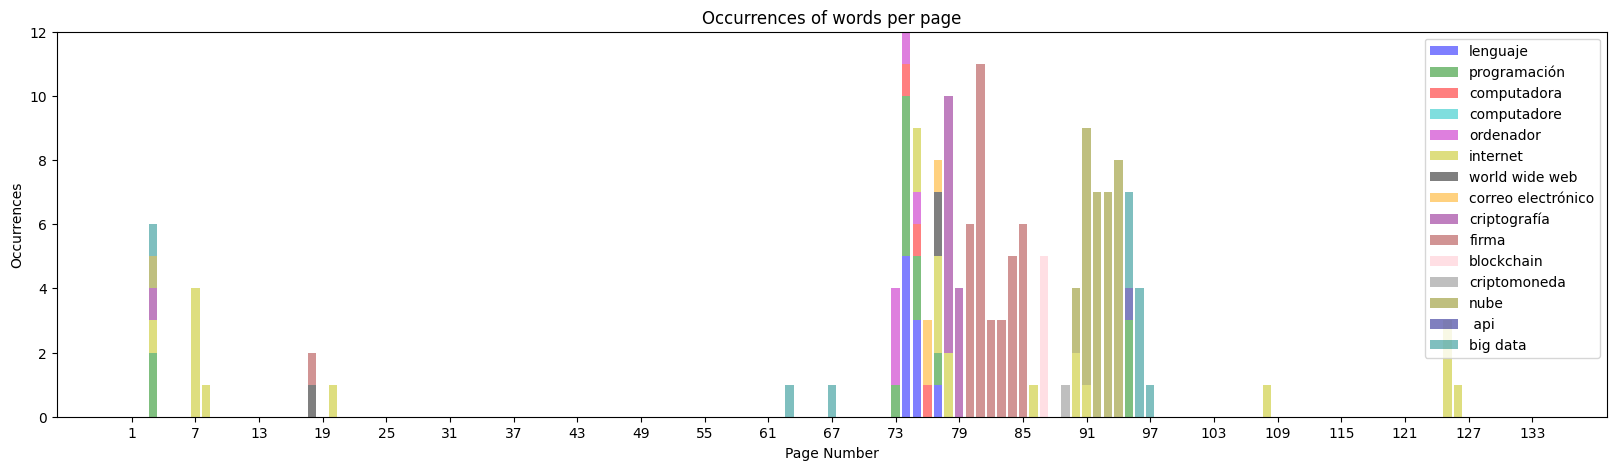

In [29]:
# Load the PDF document
doc = fitz.open(output_file)

# Count the occurrences of the list of words on each page
words = ['lenguaje','programación','computadora','computadore','ordenador','internet','world wide web','correo electrónico', 'criptografía', 'firma', 'blockchain', 'criptomoneda', 'nube', ' api', 'big data']
counts = count_words_per_page(words, doc)

# Plot the results
pages = list(range(1, len(counts[words[0]]) + 1))
fig, ax = plt.subplots(figsize=(20, 5), dpi=100)

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'navy', 'teal']
bottoms = [0] * len(pages)

for i, word in enumerate(words):
    ax.bar(pages, counts[word], alpha=0.5, color=colors[i % len(colors)], label=word, bottom=bottoms)
    bottoms = [sum(x) for x in zip(bottoms, counts[word])]

ax.set_xlabel('Page Number')

# Set x-axis ticks to avoid overlapping
num_ticks = 20
tick_interval = max(len(pages) // num_ticks, 1)
ax.set_xticks(pages[::tick_interval])
ax.set_xticklabels(pages[::tick_interval])

ax.set_ylabel('Occurrences')
ax.set_title('Occurrences of words per page')
ax.legend()

# Save the plot to a file
plt.savefig("word_occurrences_per_page2.png", dpi=300)

In [27]:
# Clean up the PDF file
os.remove(output_file)